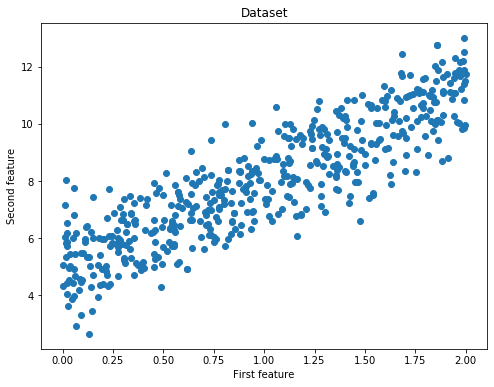

Shape X_train: (375, 1)
Shape y_train: (375, 1)
Shape X_test: (125, 1)
Shape y_test: (125, 1)


In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
from sklearn.model_selection import train_test_split
np.random.seed(24)
# We will use a simple training set
X = 2 * np.random.rand(500, 1)
y = 5 + 3 * X + np.random.randn(500, 1)

fig = plt.figure(figsize=(8,6))
plt.scatter(X, y)
plt.title("Dataset")
plt.xlabel("First feature")
plt.ylabel("Second feature")
plt.show()
# Split the data into a training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y)

print(f'Shape X_train: {X_train.shape}')
print(f'Shape y_train: {y_train.shape}')
print(f'Shape X_test: {X_test.shape}')
print(f'Shape y_test: {y_test.shape}')

In [11]:
class LinearRegression:
    
    def __init__(self):
        pass

    def getX1(self, X):
        n_samples, n_features = X.shape
        ones = np.ones(shape=(n_samples, 1))
        X1 = np.concatenate((X, ones),axis = 1)
        return X1
        
    def train_gradient_descent(self, X, y, learning_rate=0.01, n_iters=100):
        """
        Trains a linear regression model using gradient descent
        """
        # Step 0: Initialize the parameters
        n_samples, n_features = X.shape
        self.weights = np.zeros(shape = (n_features, 1))
        self.bias = 0
        costs = []
        # Step 1: Loop until iterate enough
        # J(w,b) = 1 / 2m * Sum(Pow(w * X + b - y), 2)
        # dJ/dw = 1 / m * Sum(w*X + b - y) * x
        # dJ/db = 1 / m * Sum(w*X + b - y)
        for k in range(n_iters):
            # Step 1: Compute a linear combination of the input features and weights
            h_x = np.dot(X, self.weights) + self.bias
            e = h_x - y
            
            # Step 2: Compute cost over training set
            cost = (1 / n_samples) * np.sum(e**2)
            costs.append(cost)
            if k % (n_iters / 10) == 0:
                print(f"Cost at iteration {k}: {cost}")
#             print('sum(h_x - y):', np.sum(e))
#            # wrong impl: X should be TRANSPOSED
#             for i in range(0, n_features):
#                 self.weights[i] -= learning_rate * 1.0 / n_samples * np.dot(X[i], e[i])

            # Step 3: Compute the gradients
            dJ_dw = 1.0 / n_samples * np.dot(X.T, e)
            dJ_db = 1.0 / n_samples * np.sum(e)
            
            # Step 4: Update the parameters
            self.weights -= learning_rate * dJ_dw
            self.bias -= learning_rate * dJ_db
        return self.weights, self.bias, costs

    def predict(self, X):
        return np.dot(X, self.weights) + self.bias
    
    def train_gradient_descent_joiningWB(self, X, y, learning_rate=0.01, n_iters=100):
        """
        Trains a linear regression model using gradient descent
        """
        # Step 0: Initialize the parameters
        n_samples, n_features = X.shape
        X1 = self.getX1(X)   
        self.weights = np.zeros(shape=(n_features + 1, 1))
        costs = []
        # Step 1: Loop until iterate enough
        # J(w) = 1 / 2m * Sum(Pow(w * X - y), 2)
        # dJ/dw = 1 / m * Sum(w * X - y) * x
        for k in range(n_iters):
            # Step 1: Compute a linear combination of the input features and weights
            h_x = np.dot(X1, self.weights)
            e = h_x - y
            
            # Step 2: Compute cost over training set
            cost = (1 / n_samples) * np.sum(e**2)
            costs.append(cost)
            if k % (n_iters / 10) == 0:
                print(f"Cost at iteration {k}: {cost}")
#             print('sum(h_x - y):', np.sum(e))
#            # wrong impl: X should be TRANSPOSED
#             for i in range(0, n_features):
#                 self.weights[i] -= learning_rate * 1.0 / n_samples * np.dot(X[i], e[i])

            # Step 3: Compute the gradients
            dJ_dw = 1.0 / n_samples * np.dot(X1.T, e)
            
            # Step 4: Update the parameters
            self.weights -= learning_rate * dJ_dw
        return self.weights, costs

    def predict_joiningWB(self, X):
        X1 = self.getX1(X) 
        return np.dot(X1, self.weights)
    
    def normal_equation(self, X, y):
        n_samples, n_features = X.shape
        X1 = self.getX1(X)   
        self.weights = np.zeros(shape=(n_features + 1, 1))
        # w = inv(X'X) * X'y
        XX = np.dot(X1.T, X1)
        Xy = np.dot(X1.T, y)
        self.weights = np.dot(np.linalg.pinv(XX), Xy)
        return self.weights

Cost at iteration 0: 68.12187324221418
Cost at iteration 1000: 0.9667886230044694
Cost at iteration 2000: 0.9667885792535877
Cost at iteration 3000: 0.9667885792535835
Cost at iteration 4000: 0.9667885792535836
Cost at iteration 5000: 0.9667885792535836
Cost at iteration 6000: 0.9667885792535836
Cost at iteration 7000: 0.9667885792535836
Cost at iteration 8000: 0.9667885792535836
Cost at iteration 9000: 0.9667885792535836
bias: 4.903185092304816
weights: [[3.13603984]]


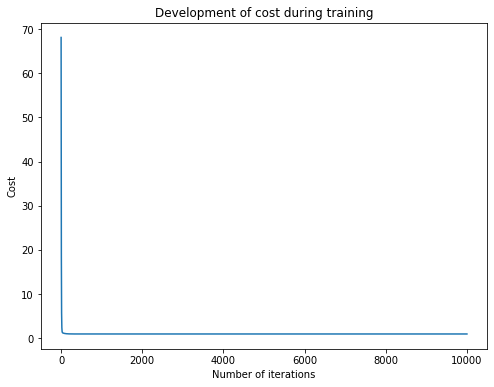

Error on training set: 0.9668
Error on test set: 1.0


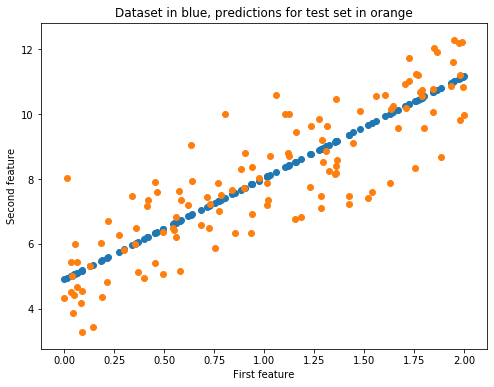

normal equation results: [[3.13603984]
 [4.90318509]]


In [13]:
n_iters = 10000
learning_rate = 0.05
joiningWB = False
lr = LinearRegression()
if joiningWB:
    w_trained, costs = lr.train_gradient_descent_joiningWB(X_train, y_train, learning_rate, n_iters)
else:
    w_trained, b_trained, costs = lr.train_gradient_descent(X_train, y_train, learning_rate, n_iters)
    print('bias:', b_trained)
print('weights:', w_trained)
fig = plt.figure(figsize=(8,6))
plt.plot(np.arange(n_iters), costs)
plt.title("Development of cost during training")
plt.xlabel("Number of iterations")
plt.ylabel("Cost")
plt.show()

n_samples, _ = X_train.shape
n_samples_test, _ = X_test.shape
if joiningWB:
    y_p_train = lr.predict_joiningWB(X_train)
    y_p_test = lr.predict_joiningWB(X_test)
else:
    y_p_train = lr.predict(X_train)
    y_p_test = lr.predict(X_test)

error_train =  (1 / n_samples) * np.sum((y_p_train - y_train) ** 2)
error_test =  (1 / n_samples_test) * np.sum((y_p_test - y_test) ** 2)

print(f"Error on training set: {np.round(error_train, 4)}")
print(f"Error on test set: {np.round(error_test)}")

# Plot the test predictions

fig = plt.figure(figsize=(8,6))
plt.title("Dataset in blue, predictions for test set in orange")
# plt.scatter(X_train, y_train)
plt.scatter(X_test, y_p_test)
plt.scatter(X_test, y_test)
plt.xlabel("First feature")
plt.ylabel("Second feature")
plt.show()

# check normal equation
ne_weights = lr.normal_equation(X_train, y_train)
print('normal equation results:', ne_weights)